In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/PFE/PFE

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/PFE/PFE


In [2]:
!git pull

Already up to date.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from prep_dataset import *
from models.GCN_model import *
from models.GIN_model import *
from train import *

In [0]:
# Setting up the default Data Type
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
device = torch.device('cuda') if use_cuda else torch.device('cpu')
dtype = torch.float32
torch.set_default_tensor_type(FloatTensor)

In [0]:
train_percentage = 0.8
batch_size = 32
ds_name = "PTC_MR"                   

train_loader, valid_loader, info = prep_dataset(ds_name, train_percentage, batch_size)


In [0]:
learning_rate = 0.0001
num_epochs = 1000
n_features = info[0]
hidden_dim = 20
n_classes = info[1]
dropout = 0.1
n_gnn_layers = 6 
n_mlp_layers = 6

In [10]:
model = GIN(n_gnn_layers, n_mlp_layers, input_dim=n_features, hidden_dim=hidden_dim, 
            output_dim=n_classes, learn_eps=False, dropout=dropout, attention=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_log = train_GNN(model, train_loader, optimizer, criterion, num_epochs=num_epochs, device=device)

Epoch [1/1000], Loss: 3.3821
Epoch [2/1000], Loss: 3.3742
Epoch [3/1000], Loss: 3.2737
Epoch [4/1000], Loss: 3.2198
Epoch [5/1000], Loss: 3.2140
Epoch [6/1000], Loss: 3.1652
Epoch [7/1000], Loss: 3.1113
Epoch [8/1000], Loss: 3.1296
Epoch [9/1000], Loss: 3.0998
Epoch [10/1000], Loss: 3.0475
Epoch [11/1000], Loss: 3.0730
Epoch [12/1000], Loss: 3.0297
Epoch [13/1000], Loss: 2.9748
Epoch [14/1000], Loss: 3.0086
Epoch [15/1000], Loss: 2.9340
Epoch [16/1000], Loss: 2.9067
Epoch [17/1000], Loss: 2.9237
Epoch [18/1000], Loss: 2.8572
Epoch [19/1000], Loss: 2.8392
Epoch [20/1000], Loss: 2.8352
Epoch [21/1000], Loss: 2.7924
Epoch [22/1000], Loss: 2.7654
Epoch [23/1000], Loss: 2.7584
Epoch [24/1000], Loss: 2.6947
Epoch [25/1000], Loss: 2.7301
Epoch [26/1000], Loss: 2.6265
Epoch [27/1000], Loss: 2.6452
Epoch [28/1000], Loss: 2.5922
Epoch [29/1000], Loss: 2.5706
Epoch [30/1000], Loss: 2.5197
Epoch [31/1000], Loss: 2.5449
Epoch [32/1000], Loss: 2.5458
Epoch [33/1000], Loss: 2.5018
Epoch [34/1000], Lo

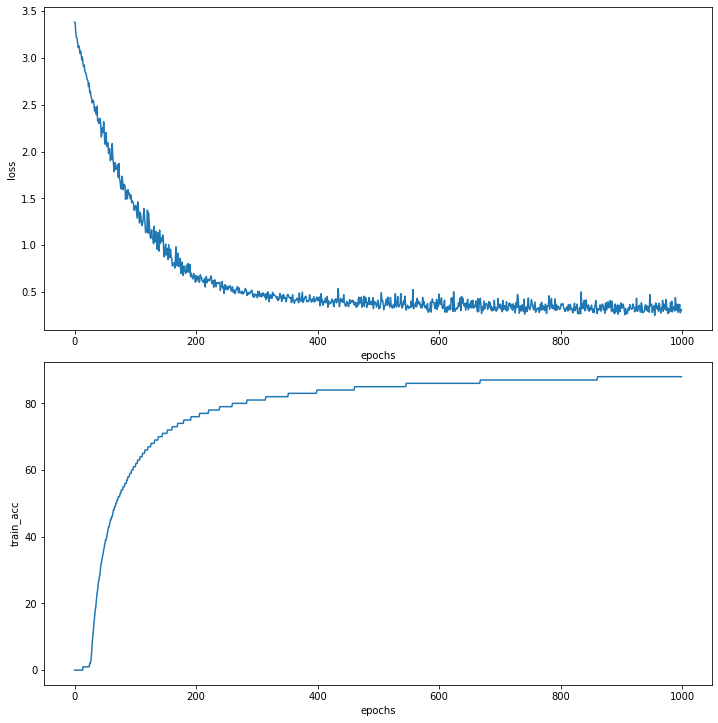

In [11]:
plot_learning_curves(train_log)

In [12]:
model = GIN(n_gnn_layers, n_mlp_layers, input_dim=n_features, hidden_dim=hidden_dim, 
            output_dim=n_classes, learn_eps=False, dropout=dropout, attention=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_log = train_GNN(model, train_loader, optimizer, criterion, num_epochs=num_epochs, device=device)

models/layers.py:103: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  scores = F.softmax(scores).flatten()


Epoch [1/1000], Loss: 2.9692
Epoch [2/1000], Loss: 2.9122
Epoch [3/1000], Loss: 2.9363
Epoch [4/1000], Loss: 2.9489
Epoch [5/1000], Loss: 2.9388
Epoch [6/1000], Loss: 2.7814
Epoch [7/1000], Loss: 2.7169
Epoch [8/1000], Loss: 2.7022
Epoch [9/1000], Loss: 2.8939
Epoch [10/1000], Loss: 2.8071
Epoch [11/1000], Loss: 3.1293
Epoch [12/1000], Loss: 2.9036
Epoch [13/1000], Loss: 2.7444
Epoch [14/1000], Loss: 2.7398
Epoch [15/1000], Loss: 2.8819
Epoch [16/1000], Loss: 2.5110
Epoch [17/1000], Loss: 2.9917
Epoch [18/1000], Loss: 2.8223
Epoch [19/1000], Loss: 2.8856
Epoch [20/1000], Loss: 2.6242
Epoch [21/1000], Loss: 2.6018
Epoch [22/1000], Loss: 2.7452
Epoch [23/1000], Loss: 2.8837
Epoch [24/1000], Loss: 2.9402
Epoch [25/1000], Loss: 2.8281
Epoch [26/1000], Loss: 2.5567
Epoch [27/1000], Loss: 2.9338
Epoch [28/1000], Loss: 2.9204
Epoch [29/1000], Loss: 2.8338
Epoch [30/1000], Loss: 2.6924
Epoch [31/1000], Loss: 2.7764
Epoch [32/1000], Loss: 2.3314
Epoch [33/1000], Loss: 2.5836
Epoch [34/1000], Lo

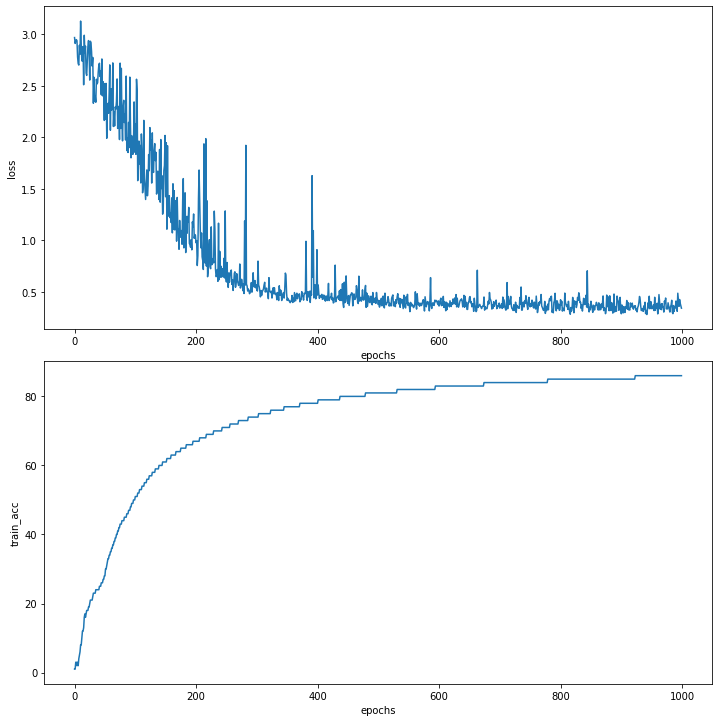

In [13]:
plot_learning_curves(train_log)